# Algoritmo de random forest

Es un modelo muy popular de regresión utilizado cuando la variable a predecir (dependiente) es cualitativa (es decir númerica discreta, o nóminal); basada en la probabilidad de que un evento ocurra a partir de las variables independientes las cuales pueden ser categoricas o númericas (la importancia) de las variables independientes.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de Random Forest; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">aquí</a>

In [1]:
!pip install sklearn

Ahora vamos a agregar la librería que contiene el modelo de regresión logística y la librería datetime, puesto que vamos a crear una función **random_forest_algorithm** que recibe como parametro las variables **iterations, train_data, x_variables, y_variable** que hacen referencia la cantidad máxima de iteraciones para la convergencia del modelo, el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn.ensemble import RandomForestRegressor

import datetime

def random_forest_algorithm(train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = RandomForestRegressor()
    model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

,animal_name,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
x_columns =  ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
target_column_name = 'type'
y_columns = [target_column_name]
target_classes_name = ['1', '2', '3', '4', '5', '6', '7']

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de regresión logística con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.475410,0.229508,0.540984,0.459016,0.262295,0.327869,0.557377,0.639344,0.885246,0.819672,0.098361,0.196721,2.557377,0.770492,0.131148,0.475410,2.459016
std,0.503539,0.424006,0.502453,0.502453,0.443533,0.473333,0.500819,0.484176,0.321370,0.387651,0.300273,0.400819,1.901969,0.424006,0.340363,0.503539,1.893619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
train_data.corr(method='pearson')

,hair,feathers,eggs,milk,airbone,aquatic,predator,toother,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.519564,-0.835855,0.835855,-0.194517,-0.455103,-0.209104,0.509910,0.033768,0.446514,-0.093966,-0.305947,0.588832,-0.104937,0.213623,0.342672,-0.477384
feathers,-0.519564,1.000000,0.502733,-0.502733,0.649424,-0.132054,-0.063047,-0.726668,0.196502,0.255992,-0.180264,-0.270089,-0.161269,0.297872,0.018932,-0.129251,-0.133395
eggs,-0.835855,0.502733,1.000000,-1.000000,0.399683,0.292953,0.040174,-0.691833,-0.331646,-0.432049,0.304240,0.124814,-0.320784,-0.111576,-0.129409,-0.506481,0.715614
milk,0.835855,-0.502733,-1.000000,1.000000,-0.399683,-0.292953,-0.040174,0.691833,0.331646,0.432049,-0.304240,-0.124814,0.320784,0.111576,0.129409,0.506481,-0.715614
airbone,-0.194517,0.649424,0.399683,-0.399683,1.000000,-0.257687,-0.293975,-0.638695,-0.136096,0.279682,0.053340,-0.295084,0.060890,0.059567,0.099544,-0.418394,0.052701
aquatic,-0.455103,-0.132054,0.292953,-0.292953,-0.257687,1.000000,0.481779,0.160947,0.032331,-0.580733,0.121109,0.708548,-0.428533,-0.034035,-0.271350,-0.105465,0.331352
predator,-0.209104,-0.063047,0.040174,-0.040174,-0.293975,0.481779,1.000000,0.155494,0.093367,-0.246284,0.072674,0.274942,-0.191607,-0.015440,-0.435978,0.187435,0.059637
toother,0.509910,-0.726668,-0.691833,0.691833,-0.638695,0.160947,0.155494,1.000000,0.479372,-0.085887,-0.095845,0.371682,-0.031450,0.158376,-0.011606,0.236464,-0.416313
backbone,0.033768,0.196502,-0.331646,0.331646,-0.136096,0.032331,0.093367,0.479372,1.000000,0.232476,-0.399224,0.178174,-0.220819,0.659686,-0.012489,0.239755,-0.788398
breathes,0.446514,0.255992,-0.432049,0.432049,0.279682,-0.580733,-0.246284,-0.085887,0.232476,1.000000,-0.131447,-0.626008,0.455065,0.048206,0.182229,0.275747,-0.589205


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

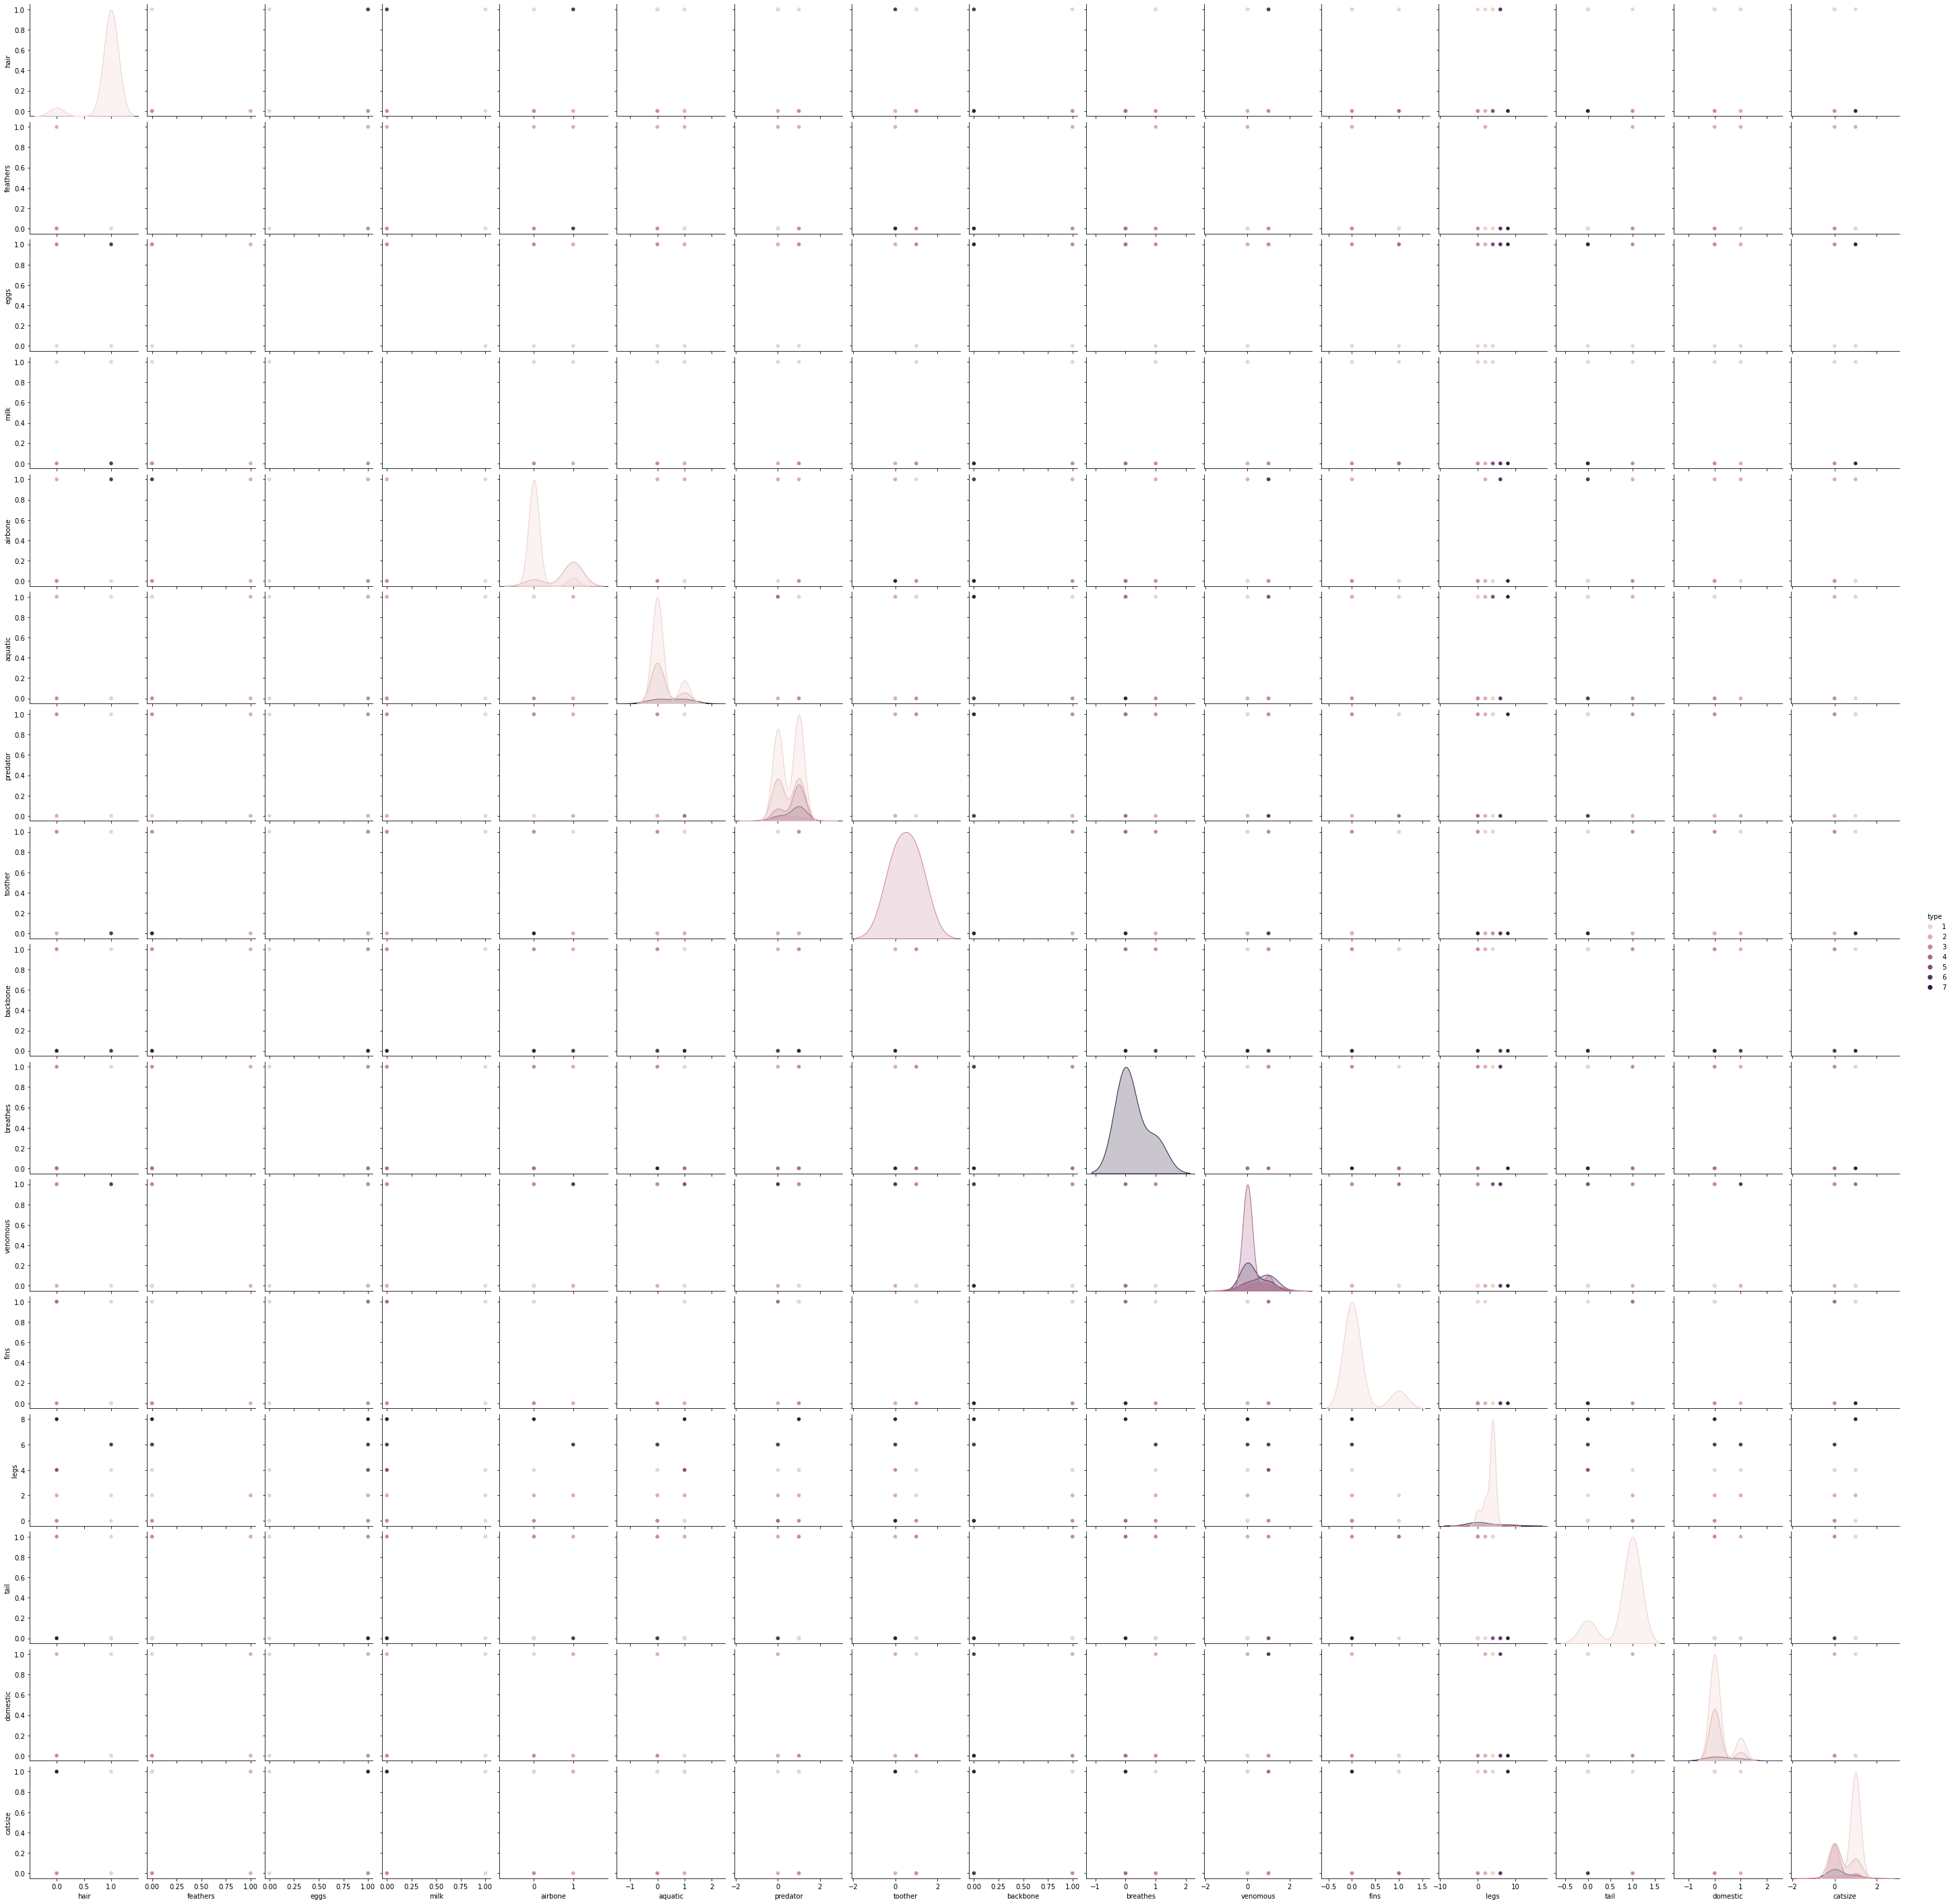

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **random_forest_algorithm** definida previamente en esta guía, pasando como parametros:
1. El número máximo de iteraciones para que el algoritmo de regresión logística
2. El conjunto de datos de entrenamiento
3. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
4. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
x_columns = ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
y_column = 'type'
model, train_elapsed_time = random_forest_algorithm(train_data, x_columns, y_column)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [10]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([1.  , 1.  , 1.  , 4.  , 6.7 , 6.7 , 3.99, 2.11, 1.  , 6.62, 1.04,
       6.29, 5.99, 2.01, 6.31, 2.  , 6.7 , 1.  , 4.27, 2.  , 3.99, 2.45,
       1.  , 1.  , 1.  , 1.  , 5.85, 4.  , 2.62, 2.11, 3.33, 6.84, 6.7 ,
       2.11, 6.62, 4.8 , 3.84, 3.99, 1.  , 1.  ])

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [12]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [13]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Random forest', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [14]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Random forest,0.2175,0.158245,224.879,22.007
